# Assignment 4: EDA and Bootstrapping

## Objective

Statistics play a vital role in data science for two reasons. First, it can be used to gain a deep understanding of data. This process is known as **Exploratory Data Analysis (EDA)**. Second, it can be used to infer the relationship between a sample and the population. This process is known as **inference**. In this assignment, you will learn about EDA and statistical inference through the analysis of a very interesting dataset - [property tax report data](http://data.vancouver.ca/datacatalogue/propertyTax.htm). Specifically, you will learn the followings:

1. Be able to perform EDA on a single column (i.e., univariate analysis) 
2. Be able to perform EDA on multiple columns (i.e., multivariate analysis)
3. Be able to extract insights from visualizations
4. Be able to ask critical questions about data
5. Be able to estimate a population parameter based on a sample
6. Be able to use the bootstrap to quantify the uncertainty of an estimated value

In this assignment, you can use [pandas](https://pandas.pydata.org/) or PySpark to manipulate data, and use [matplotlib](https://matplotlib.org/) or [seaborn](https://seaborn.pydata.org) to make plots. 

You can download the datasets of each assignment from  http://tiny.cc/cmpt733-datasets.

## Part 1. EDA

Imagine you are a data scientist working at a real-estate company. In this week, your job is to analyze the Vancouver's housing price. You first download a dataset from [property_tax_report_2018.zip](http://tiny.cc/cmpt733-datasets/property_tax_report_2018.zip). The dataset contains information on properties from BC Assessment (BCA) and City sources in 2018.  You can find the schema information of the dataset from this [webpage](http://data.vancouver.ca/datacatalogue/propertyTaxAttributes.htm). But this is not enough. You still know little about the data. That's why you need to do EDA in order to get a better and deeper understanding of the data.

We first load the data as a DataFrame. To make this analysis more interesting, I added two new columns to the data: `CURRENT_PRICE` represents the property price in 2018; `PREVIOUS_PRICE` represents the property price in 2017. 

In [1]:
import pandas as pd

df = pd.read_csv("property_tax_report_2018.csv")

df['CURRENT_PRICE'] = df.apply(lambda x: x['CURRENT_LAND_VALUE']+x['CURRENT_IMPROVEMENT_VALUE'], axis = 1)

df['PREVIOUS_PRICE'] = df.apply(lambda x: x['PREVIOUS_LAND_VALUE']+x['PREVIOUS_IMPROVEMENT_VALUE'], axis = 1)


Now let's start the EDA process. 

**Hint.** For some of the following questions, I provided an example plot (see [link](A4-plots.html)). But note that you do not have to use the same plot design. In fact, I didn't do a good job to follow the *Principles of Visualization Design* presented in Lecture 4.  You should think about how to correct the bad designs in my plots.

### Question 1. Look at some example rows
Print the first five rows of the data:

In [2]:
# --- Write your code below ---
df.head()

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONE_NAME,ZONE_CATEGORY,LOT,BLOCK,PLAN,DISTRICT_LOT,...,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,CURRENT_PRICE,PREVIOUS_PRICE
0,025-734-601,STRATA,7.500400e+11,75004024,C-2,Commercial,25,NaN,BCS498,2027,...,242000,2018,472000.0,238000.0,2003.0,2003.0,NaN,3,834000,710000.0
1,029-700-868,STRATA,6.381830e+11,63818250,CD-1 (464),Comprehensive Development,132,NaN,EPS2983,200A,...,327000,2018,603000.0,329000.0,NaN,NaN,NaN,13,1042000,932000.0
2,029-814-227,STRATA,1.708260e+11,17082596,CD-1 (535),Comprehensive Development,25,NaN,EPS3173,311,...,273000,2018,416000.0,273000.0,NaN,NaN,NaN,12,780000,689000.0
3,029-918-731,STRATA,6.401940e+11,64019406,IC-3,Light Industrial,40,26,EPS2425,200A,...,170000,2018,168000.0,170000.0,NaN,NaN,NaN,13,397000,338000.0
4,017-393-400,STRATA,6.011150e+11,60111496,CD-1 (233),Comprehensive Development,7,NaN,LMS75,185,...,380000,2018,531000.0,385000.0,1991.0,1991.0,NaN,27,1181000,916000.0


### Question 2. Get summary statistics

From the above output, you will know that the data has 28 columns. Please use the describe() function to get the summary statistics of each column.

In [3]:
# --- Write your code below ---
df.describe()

,FOLIO,LAND_COORDINATE,TO_CIVIC_NUMBER,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,CURRENT_PRICE,PREVIOUS_PRICE
count,2.053460e+05,2.053460e+05,204731.000000,2.053460e+05,2.053460e+05,205346.0,2.030420e+05,2.030420e+05,194899.000000,194905.000000,0.0,205346.000000,2.053460e+05,2.030420e+05
mean,4.984322e+11,4.984322e+07,2355.494566,1.862369e+06,4.006923e+05,2018.0,1.695359e+06,3.875009e+05,1979.969641,1987.354090,NaN,16.524159,2.263062e+06,2.082860e+06
std,2.479372e+11,2.479372e+07,1947.760697,1.074259e+07,4.148662e+06,0.0,9.646130e+06,4.236152e+06,29.419729,19.839132,NaN,9.052394,1.258726e+07,1.131819e+07
min,1.963206e+10,1.963206e+06,1.000000,0.000000e+00,0.000000e+00,2018.0,0.000000e+00,0.000000e+00,1800.000000,200.000000,NaN,1.000000,1.000000e+00,1.000000e+00
25%,2.107920e+11,2.107919e+07,948.000000,4.680000e+05,9.530000e+04,2018.0,3.840000e+05,9.470000e+04,1965.000000,1975.000000,NaN,9.000000,6.530000e+05,5.670000e+05
50%,6.122360e+11,6.122363e+07,1777.000000,1.057000e+06,1.830000e+05,2018.0,9.440000e+05,1.810000e+05,1990.000000,1992.000000,NaN,16.000000,1.278000e+06,1.201000e+06
75%,6.882770e+11,6.882774e+07,3290.000000,1.692000e+06,2.950000e+05,2018.0,1.680000e+06,2.880000e+05,2002.000000,2002.000000,NaN,25.000000,1.984000e+06,1.937000e+06
max,8.453130e+11,8.453134e+07,9295.000000,3.516727e+09,6.117980e+08,2018.0,3.319471e+09,6.262320e+08,2015.000000,2015.000000,NaN,30.000000,3.516727e+09,3.319471e+09


Please look at the above output carefully, and make sure that you understand the meanings of each row (e.g., std, 25% percentile).

### Question 3. Examine missing values

Now we are going to perform EDA on a single column (i.e., univariate analysis). We chose `YEAR_BUILT`, which represents in which year a property was built.  We first check whether the column has any missing value. 

In [4]:
# --- Write your code below ---
# Print the percentage of the rows whose YEAR_BUILT is missing.
num_nullval = (df['YEAR_BUILT']).isna().sum()
total_rows = df['YEAR_BUILT'].count()
value = (num_nullval / total_rows) * 100
print("Percentage of the rows whose YEAR_BUILT is missing is: "+str(value.round(2))+"%")

Percentage of the rows whose YEAR_BUILT is missing is: 5.36%


Missing values are very common in real-world datasets. In practice, you should always be aware of the impact of the missing values on your downstream analysis results.

### Question 4.  Plot a line chart

We now start investigating the values in the `YEAR_BUILT` column.  Suppose we want to know: "How many properties were built in each year (from 1900 to 2018)?" Please plot a line chart to answer the question.

Text(0, 0.5, '# of Properties')

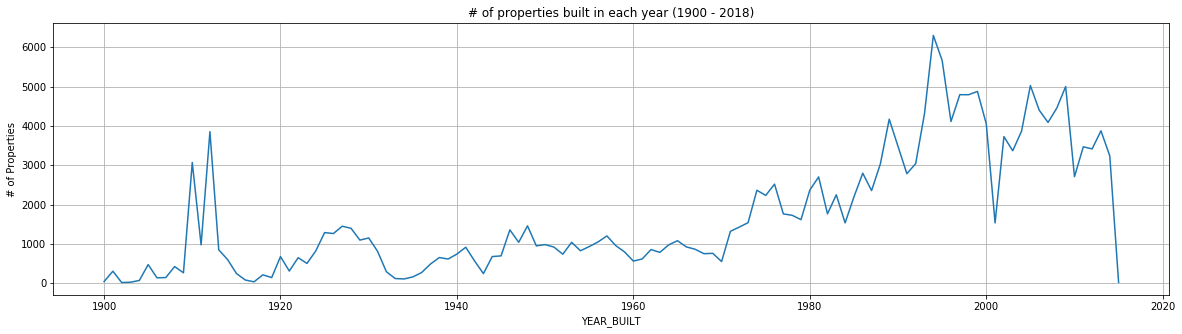

In [5]:
# --- Write your code below ---
import matplotlib.pyplot as plt
%matplotlib inline

year_count = df[(df['YEAR_BUILT'] >=1900) & (df['YEAR_BUILT'] <=2018)]
year_count =year_count.groupby('YEAR_BUILT').size().reset_index(name='count')
year_count.plot(kind='line',figsize=(20,5),x='YEAR_BUILT',y='count',legend=False,grid=True)  
plt.title("# of properties built in each year (1900 - 2018)")
plt.xlabel("YEAR_BUILT")
plt.ylabel("# of Properties")


Please write down the **two** most interesting findings that you draw from the plot. For example, you can say: <font color='blue'>"Vancouver has about 6300 properties built in 1996 alone, which is more than any other year"</font>. For each finding, please write <font color="red">no more than 2 sentences</font>.

**Findings**
1. Vancouver had the maximum number of properties built i.e. 6300 properties in 1996.
2. The number of properties built in Vancouver suddenly dropped to 1533 properties in 2001 after having almost 4000 properties in 2000. 

### Question 5. Plot a bar chart

Next, we want to find that, between 1900 and 2018, which years have the most number of properties been built? Plot a bar chart to show the top 20 years. 

Text(0, 0.5, '# of Properties')

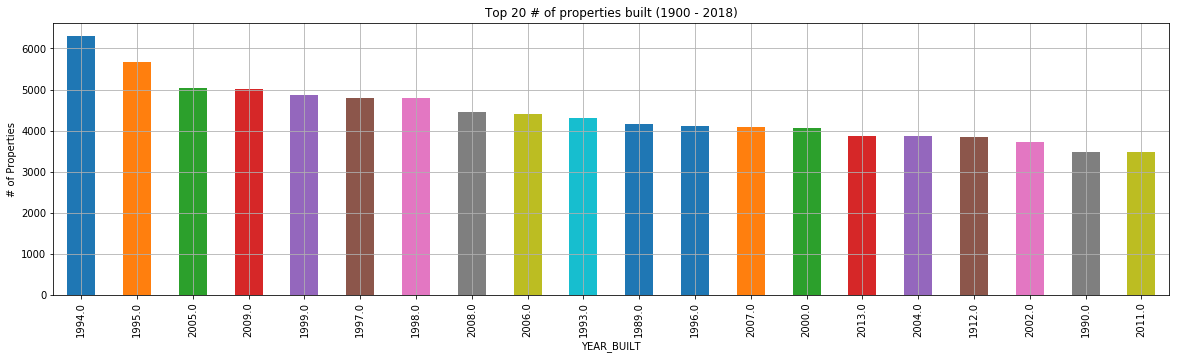

In [6]:
# --- Write your code below ---

year_count_max = year_count.sort_values('count',ascending=False).head(20)
year_count_max.plot(kind='bar',x='YEAR_BUILT',y='count',figsize=(20,5),legend=False,grid=True)
plt.title("Top 20 # of properties built (1900 - 2018)")
plt.xlabel("YEAR_BUILT")
plt.ylabel("# of Properties")      



Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. In 1994, maximum number of properties were built in Vancouver.
2. The difference between number of properties built in 1994 (1st rank) and in 2011(20th rank) is approximately 3000.

### Question 6. Plot a histogram

What's the distribution of the number of properties built between 1900 and 2018? Please plot a histogram to answer this question.

Text(0.5, 0, '# of Properties')

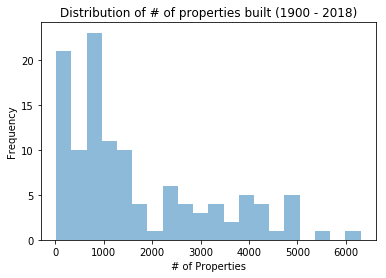

In [7]:
# --- Write your code below ---

year_count.plot.hist(x='YEAR_BUILT',y='count',alpha=0.5,bins=20,legend=False)
plt.title("Distribution of # of properties built (1900 - 2018)")
plt.xlabel("# of Properties")


Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. Most of the years had number of properties in the range 0-1000. 
2. Less than 5 years had number of properties greater than 5000.

### Question 7. Make a scatter plot

Suppose we are interested in those years which built more than 2000 properties. Make a scatter plot to examine whether there is a relationship between the number of built properties and the year?

Text(0, 0.5, 'YEAR_BUILT')

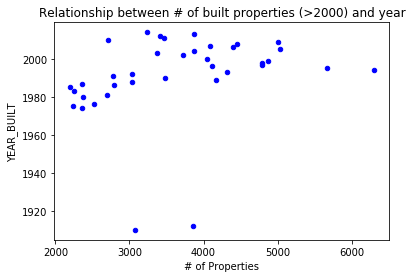

In [8]:
# --- Write your code below ---

year_count_filtered = year_count[year_count['count'] > 2000]
year_count_filtered.plot.scatter(x='count',y='YEAR_BUILT',c='Blue')
plt.title("Relationship between # of built properties (>2000) and year")
plt.xlabel("# of Properties")
plt.ylabel("YEAR_BUILT")

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. There is no visible relationship between the number of built properties and the year.
2. Most of the properties were built after 1980 for number of built properties greater than 2000 since the data points are accumulated above year_built > 1980.

### Question 8. PDF and CDF

Can you believe that you have already drawn 8 interesting findings by exploring a single column! This is the power of EDA combined with critical thinking. Now we are moving to multivariate analysis.

Suppose you want to compare the housing price between this year and last year, i.e., CURRENT_PRICE vs. PREVIOUS_PRICE. 
You can plot their distributions, and make the comparison. There are two ways to define a distribution: [Probabilistic Distribution Function](https://en.wikipedia.org/wiki/Probability_density_function) (PDF) and [Cumulative Distribution Function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF). 

In the following, please make two plots and put them side-by-side.  
* In the first plot, use histograms to plot the probabilistic distributions of CURRENT_PRICE and PREVIOUS_PRICE.
* In the second plot, use histograms to plot the cumulative distributions of CURRENT_PRICE and PREVIOUS_PRICE.

There are a few properties which are way more expensive than the others. For both plots, please exclude those properties by setting `xlim` = (0, 5Million).

C:\Users\SUBIKSHAA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SUBIKSHAA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Probability Distribution')

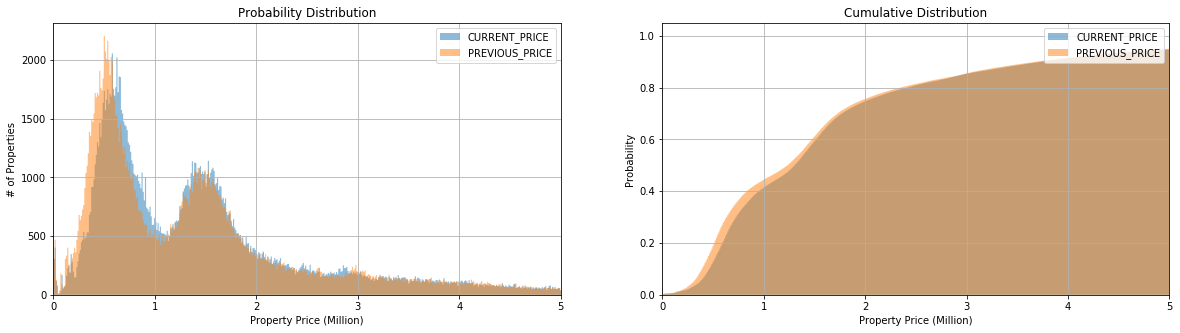

In [9]:
# --- Write your code below ---
subset_df= df[(df['YEAR_BUILT'] >=1900) & (df['YEAR_BUILT'] <=2018)]
subset_df['CURRENT_PRICE'] = subset_df['CURRENT_PRICE']/1000000
subset_df['PREVIOUS_PRICE'] = subset_df['PREVIOUS_PRICE']/1000000
price_comparison = subset_df[['CURRENT_PRICE','PREVIOUS_PRICE']]

figure,axes = plt.subplots(1,2)
price_comparison.plot(ax=axes[0],kind='hist',histtype='stepfilled',xlim=(0,5),figsize=(20,5),bins=90000,alpha=0.5,grid=True)

price_comparison.plot(ax=axes[1],kind='hist',histtype='stepfilled',density=1,cumulative=True,xlim=(0,5),figsize=(20,5),bins=90000,alpha=0.5,grid=True)
axes[1].set_ylabel('Probability')
axes[1].set_xlabel('Property Price (Million)')
axes[1].set_title('Cumulative Distribution')
axes[0].set_ylabel('# of Properties')
axes[0].set_xlabel('Property Price (Million)')
axes[0].set_title('Probability Distribution')

Please write down the **two** most interesting findings that you draw from the plots. 

**Findings**
1. In the probabilistic distribtions of CURRENT_PRICE and PREVIOUS_PRICE, maximum number of properties were built in the property price less than 1 million. 
2. In cdf, probability of having previous property price belonging to range 0-1 million is greater than, probability of having current property price.

### Question 9. Use EDA to answer an interesting question (1)

In the above plots, we found that the overall housing price has increased, but we do not which type of property has increased more. 

Now we add another variable `LEGAL_TYPE` (e.g., STRATA, LAND) to the analysis, and consider three variables (`LEGAL_TYPE`, `CURRENT_PRICE`, `PREVIOUS_PRICE`) in total. 

In the following, please make two plots and put them side-by-side.
* In the first plot, please use histograms to plot the probabilistic distributions of CURRENT_PRICE and PREVIOUS_PRICE for `LEGAL_TYPE` = "STRATA".
* In the first plot, please use histograms to plot the probabilistic distributions of CURRENT_PRICE and PREVIOUS_PRICE for `LEGAL_TYPE` = "LAND".

Text(0.5, 1.0, 'PDF of LAND legal type')

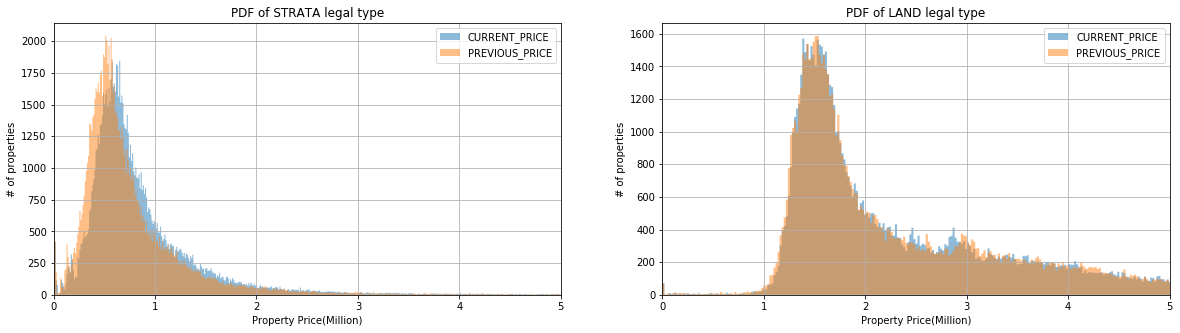

In [10]:
# --- Write your code below ---
figure,axes = plt.subplots(1,2)

legal_df1 = subset_df[subset_df['LEGAL_TYPE']=="STRATA"]
legal_df1 = legal_df1[['CURRENT_PRICE','PREVIOUS_PRICE']]
legal_df1.plot(ax=axes[0],kind='hist',histtype='stepfilled',xlim=(0,5),figsize=(20,5),bins=5000,alpha=0.5,grid=True)
axes[0].set_ylabel('# of properties')
axes[0].set_xlabel('Property Price(Million)')
axes[0].set_title('PDF of STRATA legal type')

legal_df2 = subset_df[subset_df['LEGAL_TYPE']=="LAND"]
legal_df2 = legal_df2[['CURRENT_PRICE','PREVIOUS_PRICE']]
legal_df2.plot(ax=axes[1],kind='hist',histtype='stepfilled',xlim=(0,5),figsize=(20,5),bins=50000,alpha=0.5,grid=True)
axes[1].set_ylabel('# of properties')
axes[1].set_xlabel('Property Price(Million)')
axes[1].set_title('PDF of LAND legal type')

Please write down the **two** most interesting findings that you draw from the plots. 

**Findings**
1. The number of properties are highly focused in the property price range 0-1 million for STRATA legal type. The number of properties with price > 2 million is very less.
2. The number of properties are focused in property price range 1-2 million for LAND legal type. The number of properties with price > 2 million is reasonable and decreases gradually with increase in property price.

### Question 10. Use EDA to answer interesting questions (2)

Although the housing price of the entire Vancouver area is increasing, there might be some areas whose housing price is decreasing. To answer this question, we need to consider another column -- `PROPERTY_POSTAL_CODE`.

`PROPERTY_POSTAL_CODE` (e.g., "V5A 1S6") is a six-character string with a space separating the third and fourth characters. We use the first three characters to represent an *area*. 

We first filter out the areas which have less than 10 properties. For each of the remaining areas, we calculate the percentage of the properties whose price has decreased compared to the last year. For example, if an area "V5A" has 50 properties, and 30 of them have decreased, then the percentage is 60%.

Please write code to find the top-10 areas with the highest percentages. Create a bar chart to visualize them. 

Text(0, 0.5, 'Percentage (%)')

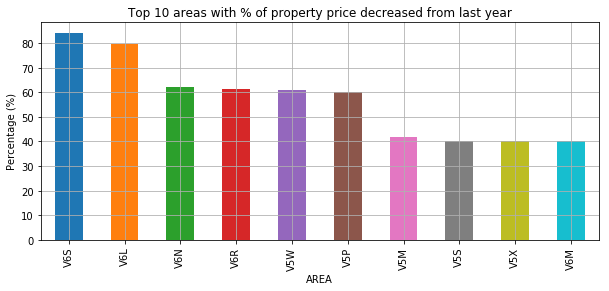

In [11]:
# --- Write your code below ---
area_df = df
split_postal = area_df["PROPERTY_POSTAL_CODE"].astype(str).str.split(n=1,expand=True)
area_df["AREA"] = split_postal[0]
new_df = area_df
area_df = area_df.groupby("AREA").size().reset_index(name='countarea')

new_df["diff"] = new_df["PREVIOUS_PRICE"]- new_df["CURRENT_PRICE"]
new_df = new_df[new_df["diff"] > 0]
new_df = new_df.groupby("AREA").size().reset_index(name='count')
new_df = new_df[new_df["count"] >= 10]
comb_df = pd.merge(area_df, new_df,on='AREA')
comb_df["percent_dec"] = (comb_df["count"]/comb_df["countarea"])*100
comb_df = comb_df.sort_values('percent_dec',ascending=False).head(10)
comb_df.plot(kind='bar',x='AREA',y='percent_dec',legend=False,grid=True,figsize=(10,4))
plt.title("Top 10 areas with % of property price decreased from last year")
plt.xlabel("AREA")
plt.ylabel("Percentage (%)")

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. Area V6S has the maximum percentage(>80%) of property price decreased from last year.
2. Areas V5S, V5X, V6M have the same percentage of property price decreased from last year (40%).

### Question 11. Come up with your own question.

*You need to complete the following three tasks.*

Firstly, please come up with an interesting question on your own (like Q9 and Q10). 

**A short description of the question: Top 5 zone categories with highest number of properties**

Secondly, please write code so that the output of your code can answer the question.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

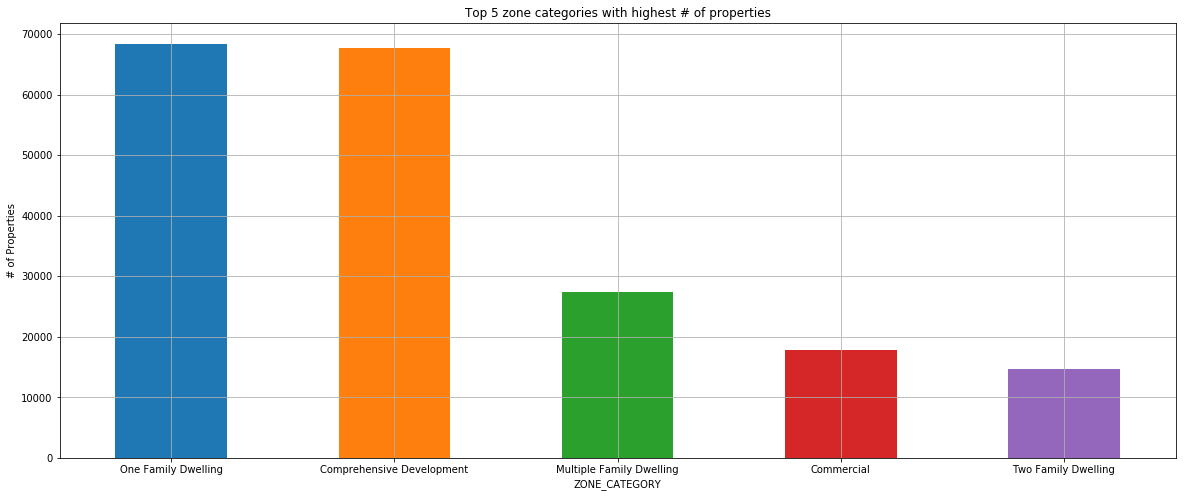

In [12]:
# --- Write your code below ---
df_zone = df.groupby('ZONE_CATEGORY').size().reset_index(name='count').sort_values('count',ascending=False).head(5)
df_zone.plot(kind='bar',x='ZONE_CATEGORY',y='count',legend=False,grid=True,figsize=(20,8))
plt.title("Top 5 zone categories with highest # of properties")
plt.xlabel("ZONE_CATEGORY")
plt.ylabel("# of Properties")
plt.xticks(rotation=0)

Thirdly, please write the two most important findings.

**Findings**
1. Maximum number of properties built were for the zone category "One Family Dwelling".
2. The number of properties built for the zone category "Multiple FamilyDwelling" is much lesser than the number of properties built for the zone category "One Family Dwelling".

## Part 2. Bootstrapping

In Part 1, we run our analysis over the full dataset. In reality, however, you may not be that lucky. It is more often than not that you can only collect a sample of the data. Whenever you derive a conclusion from a sample (e.g., The Vancouver's housing price has increased by 10\% since last year), you should ALWAYS ask yourself: <font color="blue">"CAN I TRUST IT?"</font>. In other words, you want to know that if the same analysis was conducted on the full data, would the same conclusion be derived? In Part 2, you will learn how to use bootstrapping to answer this question. 

Please download the sample dataset [property_tax_report_2018_sample.zip](http://tiny.cc/cmpt733-datasets/property_tax_report_2018_sample.zip), and load it as a DataFrame. 

In [13]:
df_sample = pd.read_csv("property_tax_report_sample.csv")

df_sample['CURRENT_PRICE'] = df_sample.apply(lambda x: x['CURRENT_LAND_VALUE']+x['CURRENT_IMPROVEMENT_VALUE'], axis = 1)

df_sample['PREVIOUS_PRICE'] = df_sample.apply(lambda x: x['PREVIOUS_LAND_VALUE']+x['PREVIOUS_IMPROVEMENT_VALUE'], axis = 1)

df_sample = df_sample[df_sample['LEGAL_TYPE'] == 'STRATA']

### Task 1. Analysis Result Without Bootstrapping

Please compute the median of PREVIOUS_PRICE and CURRENT_PRICE, respectively, and compare them in a bar chart.

[Text(0, 0, 'PREVIOUS_PRICE'), Text(0, 0, 'CURRENT_PRICE')]

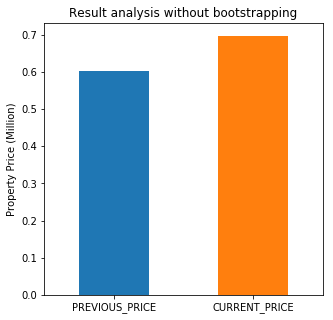

In [14]:
# --- Write your code below ---

prev_pr_median = (df_sample["PREVIOUS_PRICE"].median())/1000000
cur_pr_median = (df_sample["CURRENT_PRICE"].median())/1000000

fig,axes = plt.subplots(1,1)
val_df = pd.DataFrame({'x_value':['PREVIOUS_PRICE','CURRENT_PRICE'],'y_value':[prev_pr_median,cur_pr_median]})
val_df.plot(kind="bar",y="y_value",rot=0,figsize=(5,5),legend=False,ax=axes)
axes.set_title("Result analysis without bootstrapping")
axes.set_ylabel("Property Price (Million)")
axes.set_xticklabels(val_df['x_value'])

### Task 2. Analysis Result With Bootstrapping

From the above chart, we find that the median of PREVIOUS_PRICE is about 0.6 M, and the median of CURRENT_PRICE is about 0.7 M. Since the numbers were obtained from the sample, <font color="blue">"CAN WE TRUST THESE NUMBERS?"</font> 

In the following, please implement the bootstrap by yourself, and compute a 95%-confidence interval for each number. [This document](./MIT18_05S14_Reading24.pdf) gives a good tutorial about the bootstrap. You can find the description of the algorithm in Section 7.

[Text(0, 0, 'PREVIOUS_PRICE'), Text(0, 0, 'CURRENT_PRICE')]

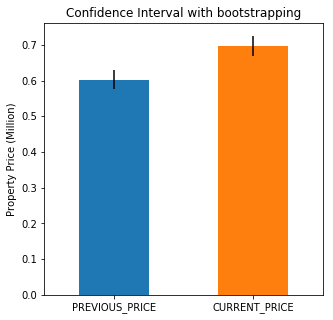

In [26]:
# --- Write your code below ---
from sklearn.utils import resample
import numpy as np

iterations = 10000
sample_median_cp = []
sample_median_pp = []
sub_cp =[]
sub_pp =[]

n_size = int(df_sample.count()[0] / 2)
value = df_sample[['PREVIOUS_PRICE','CURRENT_PRICE']]
pp_median = df_sample['PREVIOUS_PRICE'].median()
cp_median = df_sample['CURRENT_PRICE'].median()

for i in range(iterations):
    sample = resample(value,n_samples = n_size)
    sample_median_pp.append(sample['PREVIOUS_PRICE'].median())
    sample_median_cp.append(sample['CURRENT_PRICE'].median())

for i in range(iterations):
    sub_pp.append(sample_median_pp[i]-pp_median)
    sub_cp.append(sample_median_cp[i]-cp_median)

pp_lower= np.percentile(sub_pp,2.5) / 1000000
pp_upper =np.percentile(sub_pp,97.5) / 1000000
cp_lower= np.percentile(sub_cp,2.5) / 1000000
cp_upper =np.percentile(sub_cp,97.5) / 1000000

fig,axes = plt.subplots(1,1)
val_df2 = pd.DataFrame({'x_value':['PREVIOUS_PRICE','CURRENT_PRICE'],'y_value':[pp_median/1000000,cp_median/1000000],'ci_low':[pp_lower,cp_lower],'ci_up':[pp_upper,cp_upper]})
val_df2.plot(kind="bar",y="y_value",yerr=[val_df2['ci_low'],val_df2['ci_up']],rot=0,figsize=(5,5),legend=False,ax=axes)
axes.set_title("Confidence Interval with bootstrapping")
axes.set_ylabel("Property Price (Million)")
axes.set_xticklabels(val_df['x_value'])

## Submission

Complete the code in this [notebook](https://github.com/sfu-db/bigdata-cmpt733/blob/master/Assignments/A4/A4.ipynb), and submit it to the CourSys activity Assignment 4.